# GridSearch, RandomSearch 비교하기
[자료 출처](https://towardsdatascience.com/python-implementation-of-grid-search-and-random-search-for-hyperparameter-optimization-2d6a82ebf75c)

- dataset : heard_disesase (다양한 feature에 대한 binary classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('./heart_disease.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
X = df.drop(columns='target')
y = df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

# 10% 의 testset으로 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)

from sklearn.tree import DecisionTreeClassifier

# decision tree에 학습
tree_clf = DecisionTreeClassifier(random_state =42 )

tree_clf.fit(X_train,y_train)
y_pred_train = tree_clf.predict(X_train) #yhat
y_pred = tree_clf.predict(X_test) #yhat
y_true = y_test

# accuracy score module 활용
from sklearn.metrics import accuracy_score 
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_true, y_pred)
print(f'Train accuracy : {acc_train}')
print(f'Test accuracy : {acc_test}')

Train accuracy : 1.0
Test accuracy : 0.7096774193548387



Test confusion_matrix


Text(33.0, 0.5, 'True')

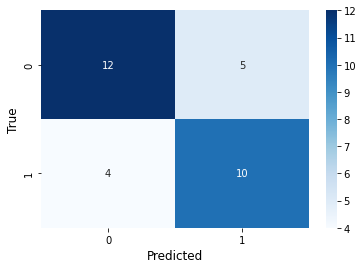

In [6]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")

sns.heatmap(cf_matrix,annot=True,cmap='Blues')

plt.xlabel("Predicted", fontsize = 12)
plt.ylabel("True", fontsize = 12)

##📌 GridSearch
- python에서 `scikit-learn`의 `GridSerachCV` 모듈를 통해 구현 가능
### parameters
- estimator : 측정에 이용되는 model
- param_grid : gridsearch에 사용되는 search space
- scoring : 성능 측정 metric. 'accuracy', 'roc_auc', 'r2', 'neg_mean_squared_error' 등
(이외의 scoring parameter는 [여기](https://scikit-learn.org/stable/modules/model_evaluation.html) 서 확인
- n_jobs : gridsearch 시, multicore processor일 경우 병렬처리할 횟수
- cv : cross-validation 시 fold 수


### ✒gs = GridSearchCV(~)인스턴스 선언 시

- gs.best_params_ : 가장 좋은 parameter

- gs.best_score_ : 그 점수

- gs.best_estimator_ : 가장 좋은 모델


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.7723544973544973
Test accuracy: 0.87
Execution time of Grid Search (in Seconds): 27.01742196083069



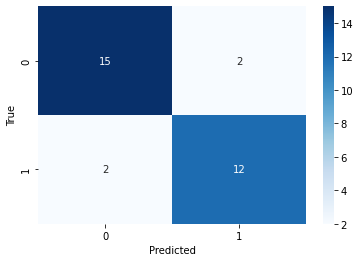

In [11]:
import time

start = time.time()

# hyperparameter space 정의함
param_space = { 'max_depth' : [2,3,4,6,8,10,12,15,20],
          'min_samples_leaf' :[1,2,4,6,8,10,20,30],
          'min_samples_split':[1,2,3,4,5,6,8,10]
          }

# GridSearchCV 모듈 이용
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(tree_clf, param_grid=param_space,scoring='accuracy', n_jobs=-1, cv=10, return_train_score = True)

# model 대신 gs 객체에 fit 함
gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)

print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print()

##📌 RandomSearch
- python에서 `scikit-learn`의 `GridSerachCV` 모듈를 통해 구현 가능
### parameters(gridsearch와 겹치는 paramter 생략)
- _n_iter_ : random하게 골라지는 hyperpareter 조합의 수를 특정합니다. 값이 10인 경우, size가 10인 hyperparameter 조합을 고려합니다. 
- _random_state_ : random 변수 생성 시 seed 값



Optimal hyperparameter combination: {'min_samples_split': 8, 'min_samples_leaf': 6, 'max_depth': 12}

Mean cross-validated training accuracy score: 0.7723544973544973
Test accuracy: 0.87
Execution time of Random Search (in Seconds): 1.595146894454956



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

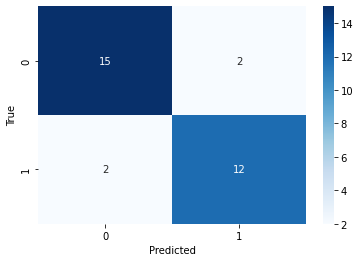

In [15]:
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(tree_clf, param_distributions=param_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

> ### 🧐정리
- RandomSearch가 시간을 훨씬 더 단축시킴에도 비슷한 결과를 준다. Randomsearch를 우선적으로 사용하자.
